Before you turn this assignment in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says "YOUR ANSWER HERE" or `YOUR CODE HERE` and remove the `raise NotImplementedError()` lines. 

Code blocks starting with a `# tests` comment provide unit tests which have to run without errors in order to get full points. Be aware that there might be further 'secret' tests to check correct implementation! I.e. the provided unit tests are necessary but not sufficient for full points!

You are always welcome to add **additional plots, tests, or debug outputs**.
However, make sure to: **1) not break the automated tests**, and **2) switch off any excessive debug output** when you submit your notebook!

Please add your name and student ID below:

In [1]:
NAME = "Konstantinos Vakalopoulos" 
STUDENT_ID = "12223236" 
# YOUR CODE HERE

In [2]:
assert len(NAME) > 0, "Enter your name!"
assert len(STUDENT_ID) > 0, "Enter your student ID!"

# Intelligent Audio and Music Analysis Assignment 1
## Audio IO, Fourier Transform, Spectrograms, and Psychoacoustics

In this assignment we will explore loading and processing of [PCM](https://en.wikipedia.org/wiki/Pulse-code_modulation) 
audio data. This includes using the Fourier transform to perform frequency analysis, generate spectrograms, and apply psychoacoustic scales.

## Task 1: Load Audio File

The first task will be to **load the audio** file located at `"data/example.wav"` into a numpy array with the
variable name `audio_buffer`. Also store the sample rate of the audio file into a variable named `fs`.
In order to achieve this, you can use the `wavfile.read` function from the _scipy_ package.
You can find documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html).

Implement the function below:
- Load the audio file `file_name``
- Return the PCM audio buffer (audio data) and sampling frequency

In [3]:
import os

# get the correct path to the audio file
dataset_path = os.path.join(os.environ['HOME'], 'shared', '194.039-2023W', 'data', 'assignment_1')
if os.path.exists('example2.wav'):
    dataset_path = '.'
    

file_name = os.path.join(dataset_path, 'example2.wav')

In [4]:
# use these variables:
from scipy.io import wavfile
import scipy.io

def load_audio_data(audio_file: str):
    sample_freq = 0 # sampling frequency
    audio_pcm_data = [] # numpy.ndarray containing audio samples (in PCM)
    # YOUR CODE HERE
    
    sample_freq, audio_pcm_data = scipy.io.wavfile.read(audio_file, mmap=False)

    
    # raise NotImplementedError()
    return audio_pcm_data, sample_freq

In [5]:
audio_buffer, fs = load_audio_data(file_name)

In [6]:
# This is a plot just for demostration purposes
'''
import matplotlib.pyplot as plt
import numpy as np
samplerate = fs
data = audio_buffer
length = data.shape[0] / samplerate
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()
'''

'\nimport matplotlib.pyplot as plt\nimport numpy as np\nsamplerate = fs\ndata = audio_buffer\nlength = data.shape[0] / samplerate\ntime = np.linspace(0., length, data.shape[0])\nplt.plot(time, data)\nplt.xlabel("Time [s]")\nplt.ylabel("Amplitude")\nplt.show()\n'

In [7]:
# we can also play the audio in this jupyter notebook
import IPython.display as ipd
ipd.Audio(audio_buffer, rate=fs)

In [8]:
# tests

assert audio_buffer.shape[0] == 264600
assert len(audio_buffer.shape) == 1
assert fs == 44100

# HIDDEN TESTS do not change or delete!

print('All tests successful!')

All tests successful!


## Task 2: Plot PCM Data

Use [pyplot](https://matplotlib.org/stable/tutorials/introductory/quick_start.html) to **plot the PCM data**.
This should result in the typical "waveform" images that are often used to visualize audio files and audio data in general.
Here are some [tutorials](https://matplotlib.org/stable/tutorials/index.html) if you want to learn more about matplotlib/pyplot.
For full points, don't forget to implement **reasonable labeling** for the plot (especially the axis)!
See pyplot's [ticks](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html) documentation.

If you are already acustomed to other plotting libraries you are free to use them, but it is your responsibility for the notebook to run without errors!

Implement the function below:
- Plot the audio waveform (PCM data)
- Add suitable title, labels, and ticks to the plot!

In [9]:
# import pyplot
import matplotlib.pyplot as plt
import numpy as np  # we might need numpy

# You should have also gotten the sample rate of our audio data when reading the file...
# It can be used to label the x-axis of the plot correctly.
# X-axis labeling can be achieved using plt.xticks
print(f"sample rate is {(fs/1000.0):.1f} kHz")

sample rate is 44.1 kHz


In [50]:
def plot_waveform(audio_data, sampling_freq):
    # YOUR CODE HERE
    length = audio_data.shape[0] / sampling_freq
    time = np.linspace(0., length, audio_data.shape[0])
    plt.plot(time, audio_data)
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.title("Audio Waveform")
    plt.show()
    # raise NotImplementedError()

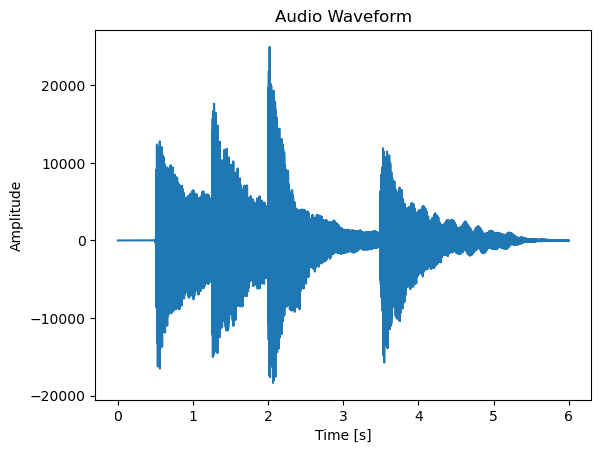

In [51]:
plot_waveform(audio_buffer, fs)

In [12]:
# HIDDEN TESTS do not change or delete!

**Have a look at the signal plot's *amplitude values (y-axis)***. Try to remember from the lecture: What do these values represent, What is their maximum and minimum and why?

In our case where we have audio signals, the amplitude, mainly, represents the air pressure deviations caused by the sound waves. Basically, the waves travel through the air in all 3 dimensions and are captured by the microphone. 
A sound wave is composed by compressions, which are the maximum values of the amplitude, and by rarefactions, which are the minimum values of the amplitude. The compressions and rarefactions are made by the different air pressure deviations and represent values of high and low, respectively, air pressures captured by the microphone. For this reason the amplitude includes positive and negative values, with minimum and maximum.

## Task 3: Calculate a DFT

Take a couple of frames (2048) to **calculate a discrete Fourier transform** (DFT) using `numpy`
[`numpy.fft`](https://numpy.org/doc/stable/reference/routines.fft.html), to do a frequency analysis.
Note that a Fourier transform will yield complex numbers as output.
**Plot the absolute values of the result** to visualize the resulting frequency spectrum.
Since the absolute values of the result are mirrored in the center, only the first half of the returned array contains relevant values. Double check with the frequency values returned by [`np.fft.fftfreq`](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html).

For full points also implement **reasonable labeling for plot, especially the x-axis**!
Hint: Have a look at the function called [`np.fft.fftfreq`](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html).

**Implement the function below:**
- Extract the indicated samples from the audio signal and store them in the `frame` variable
- Calculate the complex spectrum for `frame` and store it in the `spectrum` variable
- Calculate the absolute values of the complex spectrum. Since the values are mirrored, only use the first half of the spectrum and store it in the `abs_spec` variable.
- Then, in the second function, plot the spectrum. Don't forget to add lables, ticks and title; especially for the x (frequency) axis.

In [13]:
# we want to use 2048 frames and start at 2 seconds to leave out any silence in the beginning of 
# the signal. Note that 2048 frames corresponds to approximately 46ms @ 44.1kHz sample rate...
frame_size = 2048
start_frame = 2*fs

In [14]:
def calculate_spectrum(signal, start, frame_size):
    frame = None  # the window of the audio signal to calculate the spectrum (fft) from
    spectrum = None  # the complex spectrum
    abs_spec = None  # the absolute value spectrum (only the first half of the complex spectrum is relevant)
    # YOUR CODE HERE
    # raise NotImplementedError()
    frame = signal[start:(start+frame_size)]
    spectrum = np.fft.fft(frame)
    abs_spec = np.abs(spectrum)[:(frame_size+2) // 2]
    return frame, spectrum, abs_spec

In [15]:
frame, spectrum, abs_spec = calculate_spectrum(audio_buffer, start_frame, frame_size)

In [16]:
assert len(frame) == 2048
assert spectrum.shape == (2048, )
assert abs_spec.shape == (1025, )

# HIDDEN TESTS do not change or delete!

print('All tests successful!')

All tests successful!


**Implement the function below:**
- Plot the spectrum. 
- Add lables, ticks and title
- Especially for the x (frequency) axis, `np.fft.fftfreq` should help to find the correct frequency values!

In [17]:
def plot_spectrum(abs_spec, frame_size, sampling_freq):
    # YOUR CODE HERE
    frequencies = np.fft.fftfreq(frame_size, 1 / sampling_freq)[0:(len(abs_spec))]
    
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, abs_spec)
    plt.title("Frequency Spectrum (2048 samples @44.1 kHz)")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid()
    plt.show()

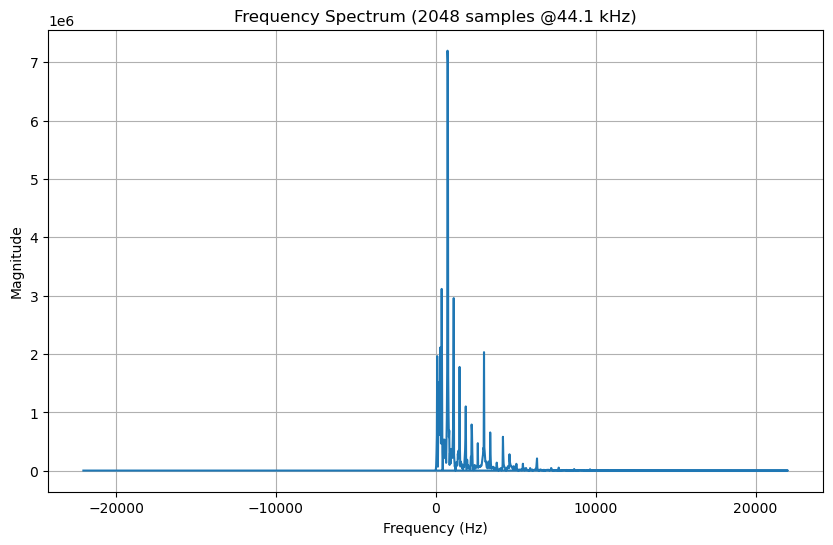

In [18]:
plot_spectrum(abs_spec, frame_size, fs)

In [19]:
# HIDDEN TESTS do not change or delete!

## Task 4: Calculate a Spectrogram

If we calculate multiple DFTs for a sliding window over the whole audio data, we can create a so-called *spectrogram*.
We could achieve this by using a for-loop and calculate each DFT separately. Alternatively we can use a library that supports spectrogram calculation out of the box.
Scipy offers this functionality in [scipy.signal.spectrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html).


In [20]:
from scipy.signal import spectrogram, get_window

frame_rate = 100  # we want our spectrogram to have a frame rate of 100Hz
window = get_window('hann', frame_size)  # we will us a Hann window for the DFTs

### 4.1 Overlap
**Overlap** and **hop size** represent the same concept: 
`hop_size = frame_size-overlap`

While `scipy.signal.spectrogram` uses overlap, the concept of hop size is easier to understand:
Hop size defines how many audio samples we jump forward when we move from one window used for DFT calculation, to the next.

If the hop size is larger than 1, we effectively reduce the **sample rate** of the PCM audio data (e.g. 44.1kHz) to a **frame rate** (e.g. 100Hz) of the spectrogram.

**Implement a function to calculate the overlap** for a combination of audio `sample_rate`, and spectrogram `frame_rate` and `frame_size`.

We will then use the same `frame_size` from the previous spectrum calculation (2048) and calculate our overlap so the resulting spectrogram has the required frame rate of 100Hz.

In [21]:
# calculate the overlap for a given audio sample rate and a desired frame rate
def calc_overlap(sample_rate, frame_rate, frame_size):
    overlap = 0
    # YOUR CODE HERE

    hop_size = sample_rate/frame_rate
    overlap = frame_size - hop_size
    return int(overlap)

In [22]:
overlap = calc_overlap(fs, frame_rate, frame_size)
print("overlap = {:d}".format(overlap))

overlap = 1607


In [23]:
# tests

assert calc_overlap(11025, 200, 1024) == 968
assert calc_overlap(1, 1, 2) == 1

# HIDDEN TESTS do not change or delete!
print('All tests successful!')

All tests successful!


### 4.2 Spectrogram and Plots
Use the `overlap` and the other parameters like `window` (DFT window function) and `fs` (sample rate) that we prepared above to **calculate a spectrogram** using `scipy.signal.spectrogram`.

**Plot the resulting spectrogram** using [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html). Make sure to implement **proper x and y axis labeling/ticks**!

Since the absolute values of the spectrogram span over a wide range of orders of magnitude, it is usually difficult to see details in the plotted image.
To fix this, **plot a second spectrogram**, where you take the logarithm of the absolute spectrogram values first.
A trick to avoid NaNs caused by $ \log(0) $ is to just add 1 to each value before taking the log: $ \hat{X} = \log_{10}(X+1) $.

Hints:
* You can plot multiple images using a matlab [subplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)
* Use the parameters `origin='lower', aspect='auto'` for `plt.imshow`, to get a proper layout.

In [24]:
def calc_spectrograms(audio_signal, sampling_freq, window, overlap):
    frequencies = None  # frequency labels for spectrogram frequency bins
    times = None # time  labels for spectrogram time frames
    plain_spectrogram = None  # 'plain' absolute-value spectrogram
    log_spectrogram = None  # spectrogram with logarithmic values
    
    # YOUR CODE HERE
    frequencies, times, plain_spectrogram = scipy.signal.spectrogram(audio_signal, sampling_freq, window, noverlap=overlap)
    log_spectrogram = np.log10(plain_spectrogram + 1)
    
    return frequencies, times, plain_spectrogram, log_spectrogram


In [25]:
frequencies, times, plain_specgram, log_specgram = calc_spectrograms(audio_buffer, fs, window, overlap)

In [26]:
# tests

assert log_specgram.shape == plain_specgram.shape == (1025, 596), "Plain and log spectrograms should have the same shape!"
assert frequencies.shape[0] == plain_specgram.shape[0], "frequencies and spectrogram matrix should fit!"
assert times.shape[0] == plain_specgram.shape[1], "times and spectrogram matrix should fit!"
print('All tests successful!')

# HIDDEN TESTS do not change or delete!

All tests successful!


Implementing the function below:
- Plot the plain spectrogram and the log spectrogram
- Plot them in a way to make comparision easy (e.g. one below the other with share x-axis)
- Add appropriate title, axis label, and ticks

In [41]:
def plot_spectrograms(plain_spec, log_spec, times, frequencies):
    # YOUR CODE HERE
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
    
    ax1.imshow(plain_spec, origin='lower', aspect='auto', extent = [min(times), max(times),min(frequencies), max(frequencies)])
    ax1.set_title('Abs Spectrogram')
    ax1.set_ylabel('Frequency (Hz)')
    
    ax2.imshow(log_spec, origin='lower', aspect='auto',extent = [min(times), max(times), min(frequencies), max(frequencies)])
    ax2.set_title('Log Spectrogram')
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Frequency (Hz)')
    
    plt.tight_layout()
    plt.show()

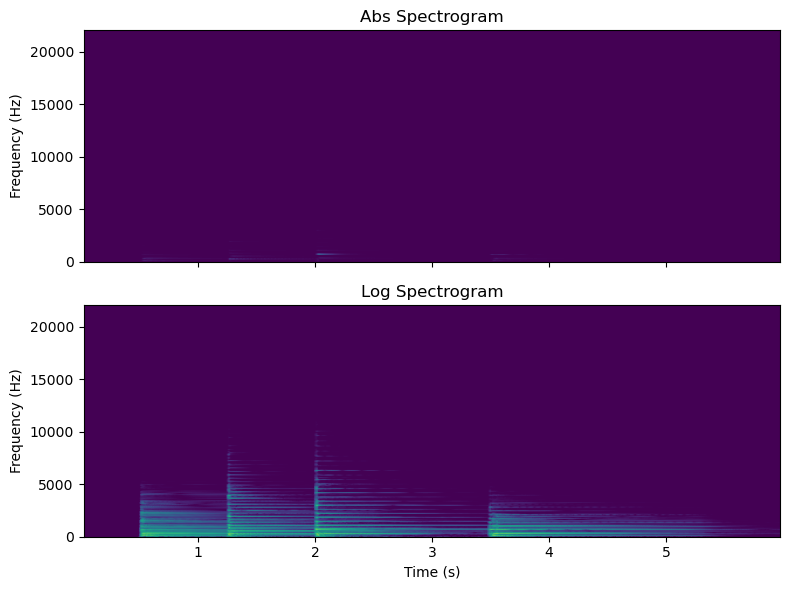

In [42]:
plot_spectrograms(plain_specgram, log_specgram, times, frequencies)

In [29]:
# HIDDEN TESTS do not change or delete!

## Task 5: Frequency Filters

To further improve the visualization of the spectrogram, it is common to change the **frequency scale** to one that reflects how humans percieve pitch; i.e. a **psychoachoustical frequency scale**.
In order to do this for a discrete spectrogram, a so-called frequency filterbank can be used.
There are many options: using log, mel, or bark filter banks are common choices.
For this example we will go with a mel filter bank.
The [mel scale](https://en.wikipedia.org/wiki/Mel_scale) is based on human perception of pitches,
and is logarithmic in nature.

A filterbank can be expressed as a matrix and its application to a spectrogram is as simple as performing a matrix multiplication.
To simplify things, you can use the [mel filterbank from librosa](https://librosa.org/doc/main/generated/librosa.filters.mel.html).
Use this function to **create a fitting filter bank** for our spectrogram and **plot the filter bank**.
Then **calculate and plot the filtered spectrogram**. For the plot you need to know which frequencies (in Hz) correspond to the mel bins of the filterbank. You can use the [`librosa.mel_frequencies`](https://librosa.org/doc/main/generated/librosa.mel_frequencies.html) function for that. Its parameters correspond to the ones of `librosa.filters.mel` of the same names.

Implement the function below:
- Calulate a plain spectrogram, as we have done in one of the previous tasks
- Create a mel filterbank
- Apply the mel filterbank to the plain spectrogram using a matrix multiplication [numpy.matmul](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html)
- Calculate the the log of the magnitudes, as we have done in one of the previous tasks. Again, add 1 bevore taking the log (log10) to avoid NaNs.


In [30]:
# class to create a mel filter bank in a numpy array
import librosa

def calc_mel_log_spec(plain_spectrogram, sampling_freq, n_fft_mel, n_bins_mel=128, fmin_mel=0):
    mel_filterbank = None
    mel_frequencies = None
    mel_log_specgram = None
    
    fmax_mel = int(sampling_freq/2)
    htk_mel = True
    
    # 1) create a mel filterbank using the parameters provided (sampling_freq, n_fft_mel, n_bins_mel, fmin_mel, fmax_mel, htk_mel)
    # 2) calculate the mel bin center frequencies using the same parameters
    # 3) calculate a mel-spectrogram using the mel filterbank and the plain spectrogram
    # 4) apply a mel-log-spectrogram by taking the log, as we did before: log10(X+1), of the mel-spectrogram

    # YOUR CODE HERE

    mel_filterbank = librosa.filters.mel(sr = sampling_freq, n_fft = n_fft_mel, n_mels = n_bins_mel, fmin = fmin_mel, fmax = fmax_mel, htk = htk_mel)
    mel_frequencies = librosa.mel_frequencies(n_mels = n_bins_mel, fmin = fmin_mel, fmax = fmax_mel, htk = htk_mel)

    result_mul = np.matmul(mel_filterbank, plain_spectrogram)

    mel_log_specgram = np.log10(result_mul + 1)
    
    return mel_filterbank, mel_frequencies, mel_log_specgram

In [31]:
mel_filterbank, mel_frequencies, mel_log_specgram = calc_mel_log_spec(plain_specgram, fs, n_fft_mel=frame_size)

In [32]:
# tests

assert plain_specgram.shape == (1025, 596), "The plain spectrogram shape should not have changed!!"
assert mel_filterbank.shape == (128, 1025), "The shape of the mel filterbank should be n_bins_mel x n_fft_mel!!"
assert mel_log_specgram.shape == (128, 596), "The shape of the mel spectrogram should be n_bins_mel x len(times)!!"
assert mel_frequencies.shape[0] == mel_filterbank.shape[0], "The mel frequency labels should fit the mel filterbank!!"
print('All tests successful!')

# HIDDEN TESTS do not change or delete!



All tests successful!


Implement the function below:
- Plot the mel filterbank
- Plot the mel-log-spectrogram
- Use correct labeling for all axis! Remeber that the mel filterbank translates between two frequencies, so both axis are frequencies!

In [66]:
def plot_mel_filterbank_and_spec(mel_filterbank, mel_log_spectrogram, times, frequencies, mel_frequencies):
    # YOUR CODE HERE
    fig, ax = plt.subplots()
    img = librosa.display.specshow(mel_filterbank, x_axis='linear', y_axis='mel', ax=ax, x_coords=frequencies, y_coords = mel_frequencies)
    ax.set(xlabel = 'Frequency (Hz)',ylabel='Frequency (Hz)', title='Mel Filterbank')
    fig, ax = plt.subplots()
    img = librosa.display.specshow(mel_log_spectrogram, x_axis='time', y_axis='mel', ax=ax, x_coords=times, y_coords = mel_frequencies)
    ax.set(ylabel='Frequency (Hz)', xlabel = 'Time (s)', title='Mel Spectrogram')

<Figure size 1200x800 with 0 Axes>

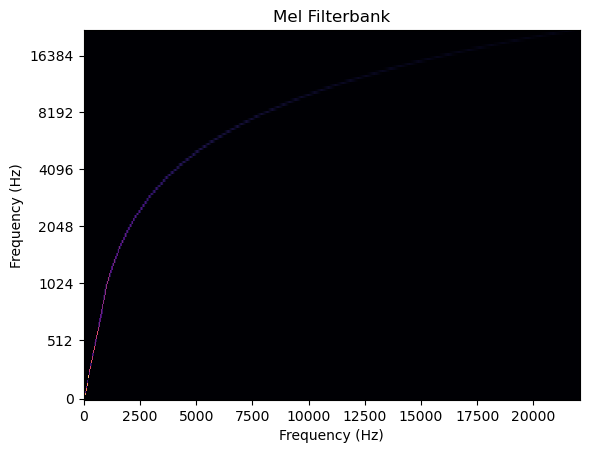

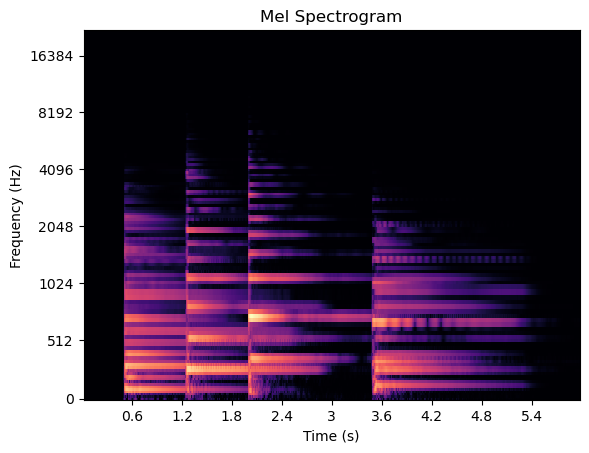

In [58]:
plot_mel_filterbank_and_spec(mel_filterbank, mel_log_specgram, times, frequencies, mel_frequencies)

In [38]:
# HIDDEN TESTS do not change or delete!

## Congratulations, you are done!

Reminder:
Before you turn this assignment in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).